In [1]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
frames = []
usernames = ["JustinTrudeau","ElizabethMay","AndrewScheer","MaximeBernier","theJagmeetSingh"]
for username in usernames:
    file_path = "../data/{}_data.csv".format(username)
    timeline_df = pd.read_csv(file_path)
    frames.append(timeline_df)
total_df = pd.concat(frames,sort=False).sample(frac=1) 
total_df.head(3)  

id                      created_at  \
1429  1078440039930085377  Thu Dec 27 23:58:36 +0000 2018   
1283  1074396812985810944  Sun Dec 16 20:12:16 +0000 2018   
711   1129783688793747456  Sat May 18 16:19:56 +0000 2019   

                                                 source  favorite_count  \
1429  <a href="http://twitter.com/download/iphone" r...             565   
1283  <a href="http://twitter.com/download/android" ...             191   
711   <a href="http://www.twitter.com" rel="nofollow...              31   

      retweet_count original_author   type  \
1429            173   MaximeBernier  tweet   
1283             53    ElizabethMay  tweet   
711               9    ElizabethMay  tweet   

                                             clean_text  \
1429  proposes drastic reduction immigration cutting...   
1283  anyone claiming right stuff leadership must pl...   
711   mission possible mean move fossil fuel 2030 ze...   

                                          original_text  lda_cluster  
1429  He proposes a drastic reduction in immigration...            5  
1283  Anyone claiming to have the right stuff for le...            2  
711   Mission Possible means we move off fossil fuel...            2

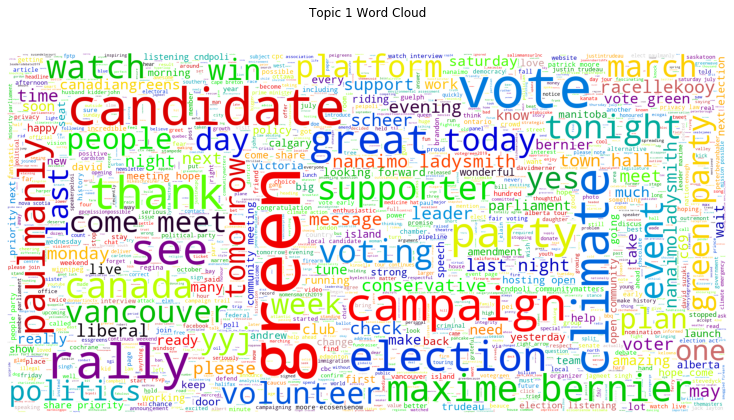

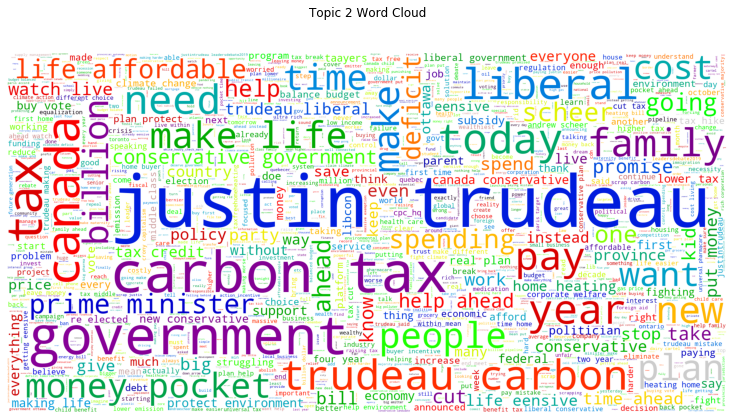

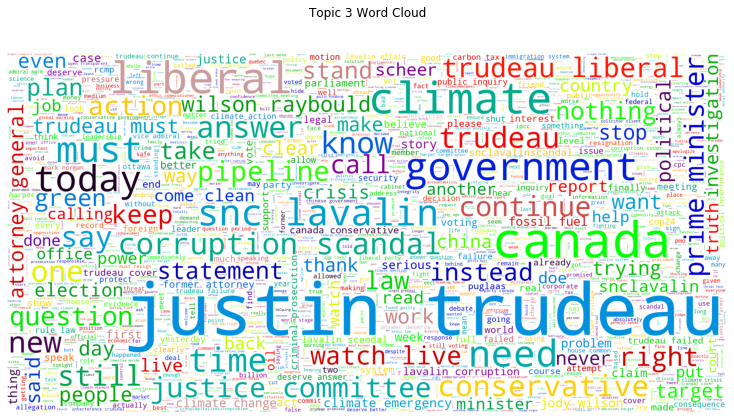

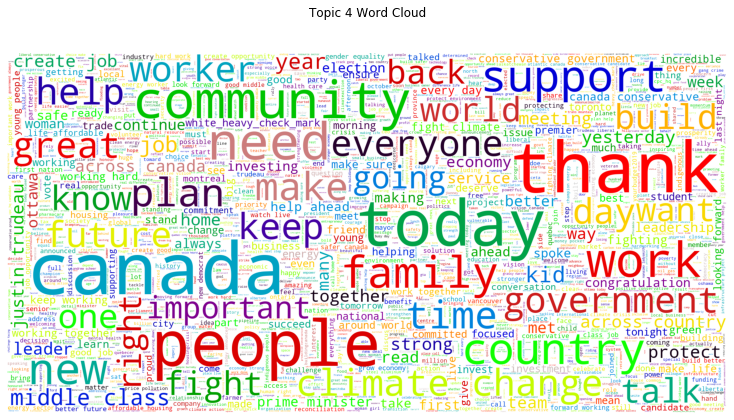

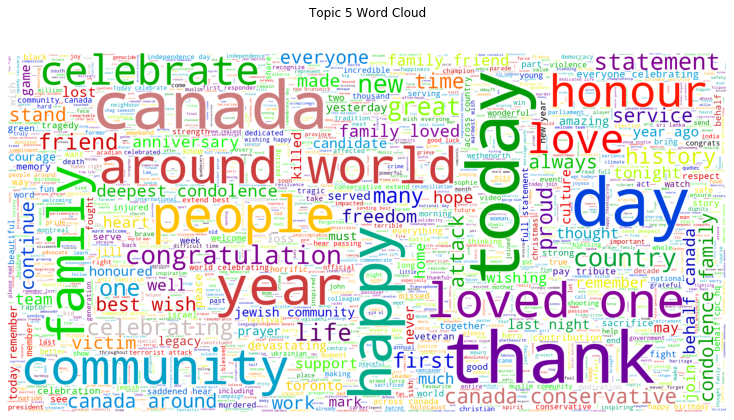

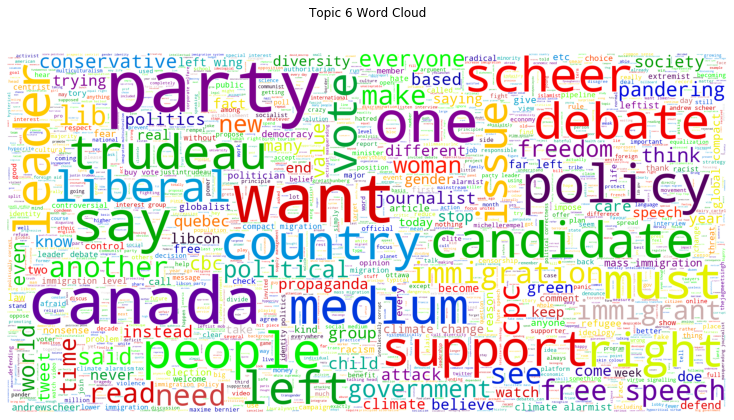

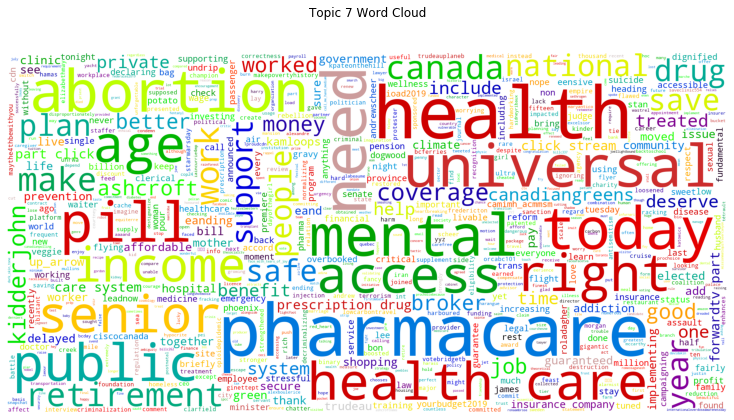

In [4]:
for topic in range(len(total_df["lda_cluster"].unique())-1):
    text = total_df[total_df["lda_cluster"]==topic]['clean_text']
    word_cloud = WordCloud(width=2000, height=1000, max_font_size=200, background_color="white", max_words=2000,
                        colormap="nipy_spectral", stopwords=STOPWORDS).generate(' '.join(text))
    plt.figure(figsize=(10, 10))
    plt.imshow(word_cloud, interpolation="hermite")
    plt.title("Topic {} Word Cloud\n\n".format(topic+1))
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig("../visualizations/wordclouds/topic_{}_wordcloud.png".format(topic+1))